# Модель преследования самолета одной ракетой 

In [22]:
#-*- coding: utf-8 -*-

import time
import pandas as pd
import math
import random as r
import numbers
import brewer2mpl
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

colors = brewer2mpl.get_map('Set3', 'Qualitative', 12).mpl_colors

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 80
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'grey'
plt.rcParams['axes.labelcolor'] = 'dimgrey'
plt.rcParams['font.family'] = 'Arial'

## Класс векторов
$\phi$ - угол между векторами в вертикальной плоскости (относительно $OZ$)<br>
$\theta$ - угол между векторами в плоскости $XOY$ (вокруг $OZ$)<br>

In [2]:
class Vector(object):

    def __init__(self, x, y, z) :
        self.x, self.y, self.z = x, y, z
    
    def __repr__(self) :
        return "vector({x}, {y}, {z})".format(x=self.x, y=self.y, z=self.z)
    
    def __add__(self, vec) :
        assert isinstance(vec, Vector)
        return Vector(self.x + vec.x, self.y + vec.y, self.z + vec.z)
        
    def __sub__(self, vec) :
        assert isinstance(vec, Vector)
        return Vector(self.x - vec.x, self.y - vec.y, self.z - vec.z)
        
    def __mul__(self, scalar) :
        assert isinstance(scalar, numbers.Number)
        return Vector(self.x * scalar, self.y * scalar, self.z * scalar)
        
    def __rmul__(self, scalar) :
        assert isinstance(scalar, numbers.Number)
        return self * scalar
        
    def __div__(self, scalar) :
        assert isinstance(scalar, numbers.Number)
        return Vector(self.x / scalar, self.y / scalar, self.z / scalar)

    def __and__(self, vec) : #  _&_
        assert isinstance(vec, Vector)
        scalar = self.x * vec.x + self.y * vec.y + self.z * vec.z
        if scalar >= -1.0 and scalar <= 1.0 : return scalar 
        elif scalar < -1.0 : return -1.0
        elif scalar > 1.0 : return 1.0
        
        return self.x * vec.x + self.y * vec.y + self.z * vec.z

    def __neg__(self) :
        return Vector(-self.x, -self.y, -self.z)
        
    def vec_list(self) :
        return [self.x, self.y, self.z]
    
    def normalized(self) :
        length = self.norm()
        if length < 1e-10:
            return Vector(0, 0, 0)
        else:
            return self * (1 / length)
    
    def norm(self) :
        return np.sqrt(self.x**2 + self.y**2 + self.z**2)
     
    def vec_normal(self) : 
        return Vector(-self.y, self.x, self.z)
    
    def n_normal(vec_1, vec_2) :
        assert isinstance(vec_1, Vector)
        assert isinstance(vec_2, Vector)
        
        n_1 = vec_1.give_y() * vec_2.give_z() - vec_2.give_y() * vec_1.give_z()
        n_2 = -(vec_1.give_x() * vec_2.give_z() - vec_2.give_x() * vec_1.give_z())
        n_3 = vec_1.give_x() * vec_2.give_y() - vec_2.give_x() * vec_1.give_y()
        n_normal = Vector(n_1, n_2, n_3).normalized()
        
        return n_normal 
        
    def rotated_theta(self, theta_way):
        
        try :
            M_z = [[math.cos(theta_way), -math.sin(theta_way), 0],
                   [math.sin(theta_way), math.cos(theta_way), 0],
                   [0, 0, 1]]
            return (Vector.mult_matr(self,M_z)).normalized()
        
        except Exception :
            print('Error rotated theta', self, phi_way)
            return .0
        
        
    def rotated_phi(self, phi_way):
        
        try :
            if self.x != 0 or self.y != 0 :
                V = Vector(-self.y, self.x, 0).normalized()
            elif self.x == 0 and self.y == 0 :
                V = Vector(-1, 1, 0).normalized()
        
            M_xy = [[math.cos(phi_way) + (1 - math.cos(phi_way)) * (V.vec_list()[0])**2,
                     (1 - math.cos(phi_way)) * V.vec_list()[1] * V.vec_list()[0],math.sin(phi_way) * V.vec_list()[1]],
                    [(1-math.cos(phi_way)) * V.vec_list()[1] * V.vec_list()[0],
                     math.cos(phi_way) + (1 - math.cos(phi_way)) * (V.vec_list()[1])**2,-math.sin(phi_way) * V.vec_list()[0]],
                    [-math.sin(phi_way) * V.vec_list()[1],math.sin(phi_way) * V.vec_list()[0],math.cos(phi_way)]]    
            return (Vector.mult_matr(self,M_xy)).normalized()
        
        except Exception :
            print('Error rotated phi', self, phi_way)
            return .0
    
    def rotated(self, alpha, V) : 
        
        try :
            V = V.normalized()
            M = [[math.cos(alpha) + (1 - math.cos(alpha)) * V.give_x() ** 2,
                  (1 - math.cos(alpha)) * V.give_x() * V.give_y() - math.sin(alpha) * V.give_z(),
                  (1 - math.cos(alpha)) * V.give_x() * V.give_z() + math.sin(alpha) * V.give_y()],
                 [(1 - math.cos(alpha)) * V.give_x() * V.give_y() + math.sin(alpha) * V.give_z(),
                  math.cos(alpha) + (1 - math.cos(alpha)) * V.give_y() ** 2,
                  (1 - math.cos(alpha)) * V.give_y() * V.give_z() - math.sin(alpha) * V.give_x()],
                 [(1 - math.cos(alpha)) * V.give_x() * V.give_z() - math.sin(alpha) * V.give_y(),
                  (1 - math.cos(alpha)) * V.give_y() * V.give_z() + math.sin(alpha) * V.give_x(),
                  math.cos(alpha) + (1 - math.cos(alpha)) * V.give_z() ** 2]]    
            
            return (Vector.mult_matr(self, M)).normalized()
        
        except Exception :
            print('Error rotated:', self, V, alpha)
            return .0
    
    def corner(self, vec):
        assert isinstance(vec, Vector)
        try :                
            corner = math.acos(vec.normalized() & self.normalized())
            if np.abs(corner) < 1e-5 : return .0
            elif np.abs(corner) >= 1e-5 : return corner     
        except Exception :
            print('Error corner:', vec, self)
            return .0
        
    def corner_theta(self, vec):
        assert isinstance(vec, Vector)
        try :
            if Vector.corner(Vector(self.give_x(), self.give_y(), 0), 
                             Vector(-vec.give_y(), vec.give_x(), 0)) > np.pi / 2 :
            
                return Vector.corner(Vector(self.give_x(), self.give_y(), 0), 
                                     Vector(vec.give_x(), vec.give_y(), 0))
            
            if Vector.corner(Vector(self.give_x(), self.give_y(), 0), 
                             Vector(-vec.give_y(), vec.give_x(), 0)) <= np.pi / 2 :
            
                return -Vector.corner(Vector(self.give_x(), self.give_y(), 0), 
                                     Vector(vec.give_x(), vec.give_y(), 0))        
        except Exception :
            print('Error Vector:'), vec, self
            return .0
        
    def corner_phi(self, vec):
        assert isinstance(vec, Vector)
        try :
            
            corner = (Vector.corner(self, Vector(0, 0, 1)) -
                      Vector.corner(vec, Vector(0, 0, 1)))
            return corner
        
        except Exception :
            print('Error Vector', vec, self)
            return .0
            
    
    def mult_matr(self, x): 
        return Vector(round(x[0][0]*self.x + x[0][1]*self.y + x[0][2]*self.z,5), 
                      round(x[1][0]*self.x + x[1][1]*self.y + x[1][2]*self.z,5),
                      round(x[2][0]*self.x + x[2][1]*self.y + x[2][2]*self.z,5))
    
    def vec_round(self, a):
        return Vector(round(self.x, a), round(self.y, a), round(self.z, a))
    
    def give_x(self):
        return self.x
    
    def give_y(self):
        return self.y
    
    def give_z(self):
        return self.z

## Ракета
Основные методы наведения: <br>
1. пропорциональный (с коэффициентом $k$) <br>
2. модифицированный (траектория наведения зависит от расстояния между объектами) <br>
3. опережение (с отношением скоростей)

In [41]:
class Rocket(Vector):
    
    def __init__(self, loc, vec, sp, theta, phi, method, k):
        self.loc, self.vec, self.sp, self.theta, self.phi, self.method, self.k = loc, vec, sp/360.0, theta, phi, method, k
        self.condition = ''
        self.course = ''
        self.stage = -1
        
    def step(self, loc_p, vec_p, sp_p):
        
        phi = self.phi * 2 * np.pi / 360 * 0.01
        theta = self.theta * 2 * np.pi / 360 * 0.01
        
        if self.stage == -1 : 
            
            if self.method == 'mod' or self.method == 'adv' :
                V = vec_p.normalized() * (loc_p - self.loc).norm() * (1 / 3)
                self.vec = Vector((loc_p - self.loc + V).normalized().give_x(),
                                  (loc_p - self.loc + V).normalized().give_y(), 5).normalized()
                self.stage = 0
            
            elif self.method == 'prop' :
                time = (loc_p - self.loc).norm() / self.sp * (1 / 5)
                loc_p_delta = (loc_p - self.loc + vec_p * sp_p * time).normalized()
                vis = (loc_p - self.loc).normalized()
        
                delta = Vector.corner(vis, loc_p_delta)
                n = Vector.n_normal(vis, loc_p_delta)
        
                aim = vis.rotated(delta * self.k, n)
                self.vec = Vector(aim.normalized().give_x(),
                                  aim.normalized().give_y(), 5).normalized()
                self.stage = 0
           
            elif self.method == 'dir' :
                aim = (loc_p - self.loc).normalized()
                self.vec = Vector(aim.normalized().give_x(),
                                  aim.normalized().give_y(), 5).normalized()
                self.stage = 0
           
        
        self.condition = self.situation(loc_p, vec_p, sp_p)
        
        if self.condition == 'dir' :
            aim = self.aim_dir(loc_p, vec_p, sp_p)
            
        elif self.condition == 'prop' :
            aim = self.aim_prop(loc_p, vec_p, sp_p)
        
        elif self.condition == 'mod' :
            aim = self.aim_mod(loc_p, vec_p, sp_p)
        
        elif self.condition == 'adv' :
            aim = self.aim_adv(loc_p, vec_p, sp_p)
        
        phi_aim = aim.corner_phi(self.vec)
        theta_aim = self.vec.corner_theta(aim)
        
        phi_way, theta_way = self.way(phi, theta, phi_aim, theta_aim)
        
        self.vec = self.vec.rotated_phi(phi_way).rotated_theta(theta_way)
        self.loc = self.loc + self.vec * self.sp
    
    def aim_mod(self, loc_p, vec_p, sp_p):
        
        V = vec_p.normalized() * (loc_p - self.loc).norm() * (1 / 3)
        aim = (loc_p - self.loc + V).normalized()
        return aim        
   
    def aim_dir(self, loc_p, vec_p, sp_p) :
        
        aim = (loc_p - self.loc).normalized()
        return aim
    
    def aim_prop(self, loc_p, vec_p, sp_p) :
        
        time = (loc_p - self.loc).norm() / self.sp * (1 / 5)
        loc_p_delta = (loc_p - self.loc + vec_p * sp_p * time).normalized()
        vis = (loc_p - self.loc).normalized()
        
        delta = Vector.corner(vis, loc_p_delta)
        n = Vector.n_normal(vis, loc_p_delta)
        
        aim = vis.rotated(delta * self.k, n)
                
        return aim
    
    def aim_adv(self, loc_p, vec_p, sp_p) :
        
        vis = (loc_p - self.loc).normalized()
        alpha = vec_p.corner(vis)
        beta = np.arcsin(sp_p / self.sp * np.sin(alpha))
        
        n = Vector.n_normal(vis, vec_p)
        aim = vis.rotated(beta, n)
        
        return aim
        
    def situation(self, loc_p, vec_p, sp_p) :
        
        if self.method == 'mod' : condition = 'mod'
        elif self.method == 'prop' : condition = 'prop'
        elif self.method == 'dir' : condition = 'dir'
        elif self.method == 'adv' : condition = 'adv'

        return condition
    
    def way(self, phi, theta, phi_aim, theta_aim):
        
        if phi_aim >= 0 : phi_way = min(phi_aim, phi) 
        elif phi_aim < 0 : phi_way = max(phi_aim, -phi)

        if theta_aim >= 0 : theta_way = min(theta_aim, theta) 
        elif theta_aim < 0 : theta_way = max(theta_aim, -theta)
        
        return phi_way, theta_way
    
    def give(self):
        return self.loc, self.vec, self.sp, self.theta, self.condition
    
    def f_del(self):
        print('rocket deleted')

## Самолет

In [39]:
class Plane(Vector):
    
    def __init__(self, loc, vec, sp, theta, phi, move_dist, t):
        
        self.loc, self.vec, self.sp, self.theta, self.phi, self.move_dist, self.t = loc, vec, sp/360.0, theta, phi, move_dist, t
        self.condition = 'im not in danger'
        self.visible_danger = 0
        self.primary_way = vec
        
    def step(self,loc_r, vec_r, speed_r):
        
        phi = round(self.phi * 2 * 3.1415 / 360 * 0.01, 5)
        theta = round(self.theta * 2 * 3.1415 / 360 * 0.01, 5)
        
        out = self.out(loc_r, vec_r, speed_r)
        
        phi_out = out.corner_phi(self.vec)
        theta_out = self.vec.corner_theta(out)

        phi_way, theta_way = self.way(phi, theta, phi_out, theta_out)

        self.vec = self.vec.rotated_phi(phi_way).rotated_theta(theta_way)
        
        self.loc = self.loc + self.vec * self.sp
        
    def out(self, loc_r, vec_r, speed_r):
        
        self.condition = self.danger(loc_r, vec_r, speed_r)
            
        if self.condition == 'im not in danger' : out = self.primary_way
        elif self.condition == 'right' : out = Vector(vec_r.give_y(), -vec_r.give_x(), -5.0)
        elif self.condition == 'left' : out = Vector(-vec_r.give_y(), vec_r.give_x(), -5.0)
        elif self.condition == 'up' : out = Vector(1.0, 1.0, 5.0)
                
        return out 
    
    def danger(self, loc_r, vec_r, speed_r) :
        
        dist = (loc_r - self.loc).norm()
        time = max(dist, self.move_dist) / speed_r / 100
        vis = (self.loc - loc_r).normalized()
        
        if time >= self.t and self.visible_danger == 0  : 
            condition = 'im not in danger'
        if time >= 1.5 * self.t and self.visible_danger == 1 :
            condition = 'im not in danger'
            self.visible_danger = 0 
        if time < self.t or self.visible_danger == 1:
            
            self.visible_danger = 1
            if np.abs(self.vec.corner(vec_r)) <= 3 * np.pi/4 : 
                if self.vec.corner_theta(vec_r) >= 0 :
                    condition = 'right'
                elif self.vec.corner_theta(vec_r) < 0 : 
                    condition = 'left' 
            elif np.abs(self.vec.corner(vec_r)) > 3 * np.pi/4 :
                condition = 'up' 
                
        return condition 
    

    def way(self, phi, theta, phi_aim, theta_aim):
        
        if phi_aim >= 0 : phi_way = min(phi_aim, phi) 
        elif phi_aim < 0 : phi_way = max(phi_aim, -phi)

        if theta_aim >= 0 : theta_way = min(theta_aim, theta) 
        elif theta_aim < 0 : theta_way = max(theta_aim, -theta)
        
        return phi_way, theta_way

    def give(self):
        return self.loc, self.vec, self.sp, self.theta, self.condition    

    def f_del(self):
        print('plane deleted')

## График
$elev$ - поворот по вертикали <br>
$azim$ - поворот по горизонтали <br><br>
default: 25, -65

In [30]:
def show_plot(plot_df, elev, azim) :

    plt.rcParams['figure.figsize'] = (10, 8)
        
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot(plot_df.plane_x, plot_df.plane_y, plot_df.plane_z, 'k', label = 'plane')
    ax.plot(plot_df.rocket_x, plot_df.rocket_y, plot_df.rocket_z, 'r--', label = 'rocket')
        
    ax.elev = elev
    ax.azim = azim
        
    plt.title(u'Результат: %s\nСближение: %.1f м, %.2f с\nВремя: %.2f с' %(HIT, plot_df.distance.min(),
                                                                         plot_df[plot_df['distance'] == plot_df.distance.min()].index.min(),
                                                                         plot_df.dropna().index.max()))
    
    plt.xlim(-1000,10000)
    plt.ylim(-1000,10000)
    plt.legend()
    plt.show()

## Погоня

$pic$ - y/n, построение графика <br> 
$df$ - y/n, создание полного фрейма со всеми расчетами <br>

In [36]:
def main(rocket, plane, rad_aim, df, pic):
    
    t, dt, T = .0, .01, 60
    
    global HIT
    
    TIME = np.arange(t, T, dt)
    danger, miss = 0, 0
    
    model_df = pd.DataFrame(columns = ['loc_rocket', 'vec_rocket', 'speed_rocket', 'deg_rocket', 
                                       'loc_plane', 'vec_plane', 'speed_plane', 'deg_plane', 
                                       'condition_plane', 'condition_rocket', 
                                       'distance', 'corner', 'theta', 'phi'], 
                           index = TIME, dtype = 'float')
    
    plot_df = pd.DataFrame(columns = ['rocket_x', 'rocket_y', 'rocket_z', 'plane_x', 'plane_y', 'plane_z', 'distance'], 
                           index = TIME, dtype = 'float')
    
    
    loc_r, vec_r, speed_r, deg_r, cond_r = rocket.give()
    loc_p, vec_p, speed_p, deg_p, cond_p = plane.give()
        
    for t in TIME :
        
        plane.step(loc_r, vec_r, speed_r)
        rocket.step(loc_p, vec_p, speed_p)

        loc_r, vec_r, speed_r, deg_r, cond_r = rocket.give()
        loc_p, vec_p, speed_p, deg_p, cond_p = plane.give()
        
        distance = (loc_r - loc_p).norm()
        
        if df == 'df' or df == 'y' or df == 'yes':
            model_df.loc[t] = [loc_r.vec_round(1), vec_r.vec_round(2), speed_r * 360, deg_r, 
                               loc_p.vec_round(1), vec_p.vec_round(2), speed_p * 360, deg_p, cond_p, cond_r, 
                               round(distance, 2), 
                               np.degrees(Vector.corner(vec_r, loc_p-loc_r)), 
                               np.degrees(Vector.corner_theta(vec_p, vec_r)), 
                               np.degrees(Vector.corner_phi(vec_p, vec_r))]
            
        if pic == 'pic' or pic == 'y' or pic == 'yes':
            plot_df.loc[t] = [loc_r.give_x(), loc_r.give_y(), loc_r.give_z(), 
                              loc_p.give_x(), loc_p.give_y(), loc_p.give_z(), round(distance, 2)]
        
        
        if distance < rad_aim :
            HIT = 'hit'
            break
        if distance > 50 * rad_aim and miss == 1 : 
            HIT = 'miss'
            break
        if distance < 20 * rad_aim : miss = 1         
        
        t += dt
                
    if t >= T : HIT = 'large miss'
    
    if pic == 'pic' or pic == 'y' or pic == 'yes' :
        
        show_plot(plot_df, 25, -65)

    return HIT, t, model_df.dropna(), plot_df.dropna()

### Запуски

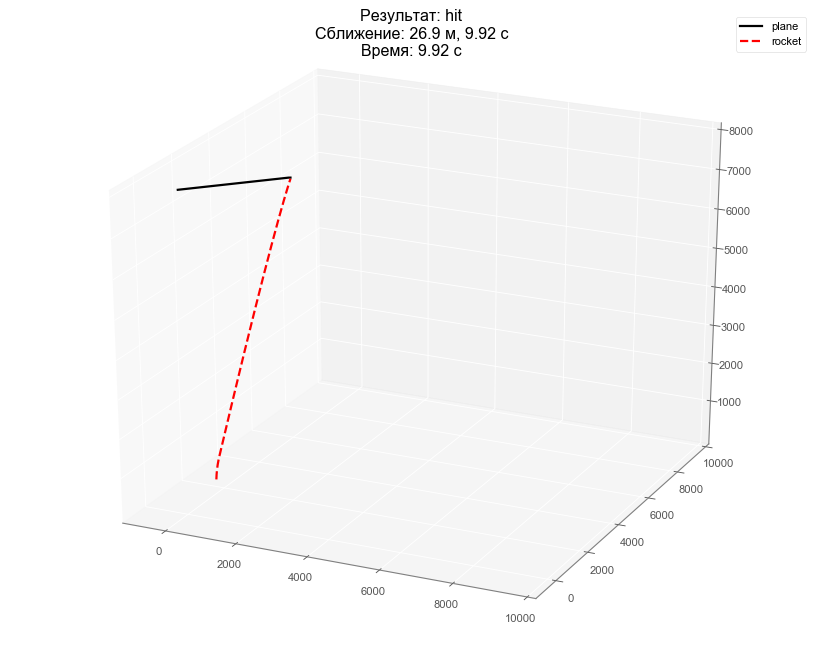

Wall time: 1.07 s


In [45]:
%%time

rad_aim = 30

plane = Plane(Vector(.0,.0,8000.0),Vector(1.0,1.0,0.0), 1055, 20.0, 20.0, 300, .5)
rocket = Rocket(Vector(-250.0,2050.0,.0), Vector(.0,.0,1.0), 3007, 17.0, 17.0, 'mod', 6)

result, t, model, plot = main(rocket, plane, rad_aim, '', 'y')

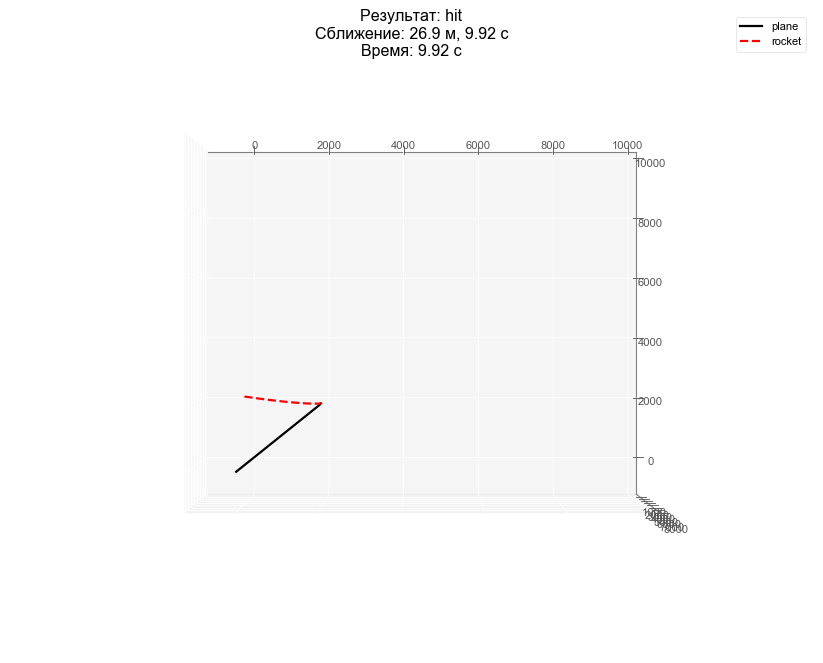

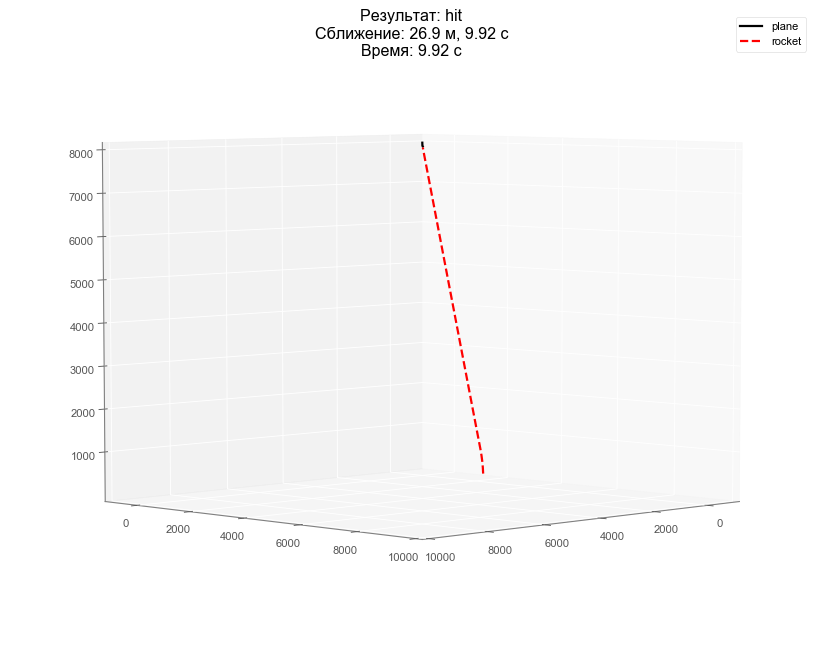

In [46]:
show_plot(plot, 90, -90)
show_plot(plot, 5, 45)

#### Относительные углы
1. $\theta$ - угол в плоскости $XOY$<br>
2. $\phi$ - угол в вертикальной плоскости <br>
3. $corner$ - угол между вектором направления ракеты и вектором визирования

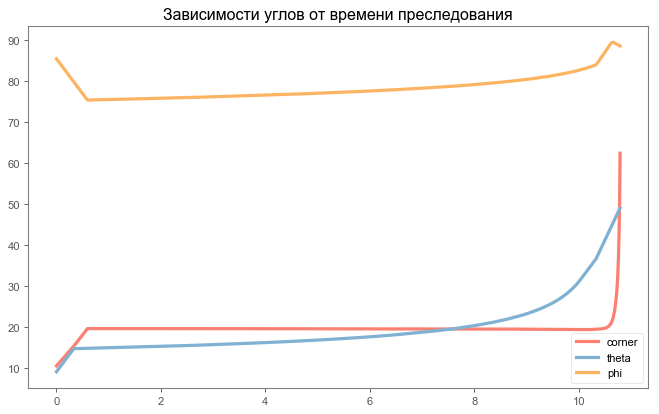

In [27]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(model.index, model['corner'], color = colors[3],  label = 'corner', linewidth=2.9)
plt.plot(model.index, model['theta'], color = colors[4], label = 'theta', linewidth=2.9)
plt.plot(model.index, model['phi'], color = colors[5], label = 'phi', linewidth=2.9)

plt.title(u'Зависимости углов от времени преследования')
plt.legend()
plt.show()

#### Расстояние между объектами

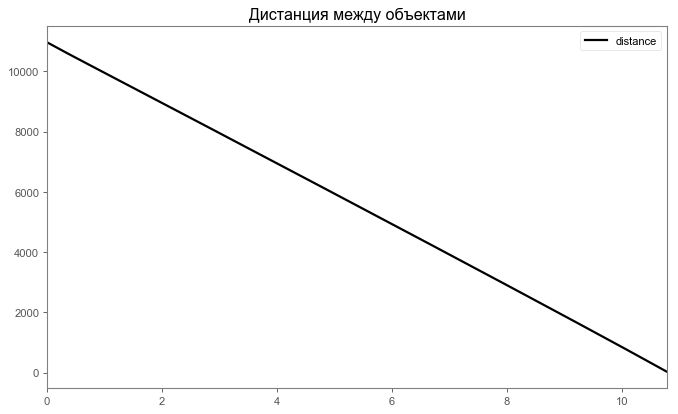

In [28]:
plt.rcParams['figure.figsize'] = (10, 6)

model['distance'].plot(color = 'k', label = 'distance')

plt.title(u'Дистанция между объектами')
plt.legend()
plt.show()